In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix_data = pd.read_csv('combined_data_1.txt',header=None, names=['cust_id','Rating'],usecols=[0,1])
netflix_data 

,cust_id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [3]:
netflix_data.head()

,cust_id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
netflix_data.tail()

,cust_id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [5]:
netflix_data.shape

(24058263, 2)

In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust_id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [7]:
netflix_data.dtypes

cust_id     object
Rating     float64
dtype: object

In [8]:
movie_count = netflix_data.isnull().sum()
movie_count

cust_id       0
Rating     4499
dtype: int64

In [9]:
movie_count = movie_count['Rating']
movie_count

4499

In [10]:
cus_count = netflix_data['cust_id'].nunique()
cus_count

475257

In [11]:
cus_count = cus_count-movie_count
cus_count

470758

In [12]:
rating_count = netflix_data['cust_id'].count()-movie_count
rating_count

24053764

In [13]:
netflix_data['Rating'].count()

24053764

In [14]:
stars = netflix_data.groupby('Rating')['Rating'].agg(['count'])

In [15]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


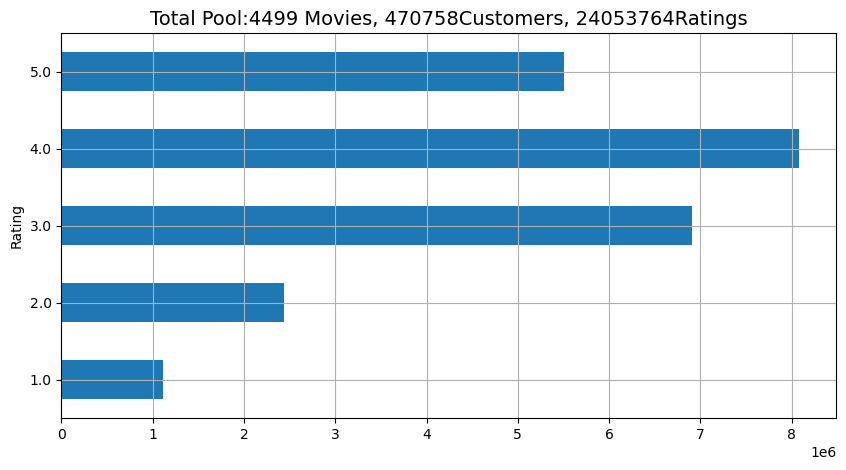

In [16]:
ax = stars.plot(kind='barh',legend=False, figsize=(10,5))
plt.title(f'Total Pool:{movie_count} Movies, {cus_count}Customers, {rating_count}Ratings', fontsize=14)
plt.grid(True)

In [17]:
df_nan = pd.DataFrame(pd.isnull(netflix_data).Rating)
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [18]:
df_nan = df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [19]:
df_nan.shape

(4499, 1)

In [20]:
df_nan = df_nan.reset_index()

In [21]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [22]:
np.full((2,3),3)

array([[3, 3, 3],
       [3, 3, 3]])

In [23]:
693-548

145

In [24]:
2707-694-1

2012

In [25]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [26]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [27]:
movie_np = []
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id+=1



In [28]:
last_record = np.full((1, len(netflix_data) - df_nan.iloc[-1,0] -1),movie_id)
movie_np = np.append(movie_np,last_record)

In [29]:
netflix_data=netflix_data[pd.notnull(netflix_data['Rating'])]
netflix_data['Movie_id']=movie_np.astype('int')
print('Now the Dataset will look like.')
netflix_data.head()

Now the Dataset will look like.


C:\Users\Admin\AppData\Local\Temp\ipykernel_7472\647927926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['Movie_id']=movie_np.astype('int')


,cust_id,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [30]:
data_movie_summary = netflix_data.groupby('Movie_id')['Rating'].agg(['count'])
data_movie_summary

,count
Movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [31]:
data_movie_summary.index = data_movie_summary.index.map(int)

In [32]:
data_movie_summary['count'].quantile(0.7)

1798.6

In [33]:
movie_benchmark = round(data_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [34]:
data_movie_summary['count']

Movie_id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [35]:
drop_movie_list = data_movie_summary[data_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_id', length=3149)

In [36]:
dataset_cust_summary=netflix_data.groupby('cust_id')['Rating'].agg(["count"])
dataset_cust_summary

,count
cust_id,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [37]:
dataset_cust_summary['count'].quantile(0.7)

52.0

In [38]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [39]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='cust_id', length=327300)

In [40]:
print('The original dataframe has: ', netflix_data.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [41]:
netflix_data=netflix_data[~netflix_data['Movie_id'].isin(drop_movie_list)]
netflix_data=netflix_data[~netflix_data['cust_id'].isin(drop_cust_list)]
print('After the trimming, the shape is: {}'.format(netflix_data.shape))

After the trimming, the shape is: (17337458, 3)


In [42]:
netflix_data.head()

,cust_id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [43]:
import pandas as pd

In [44]:
df_title = pd.read_csv("movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id', inplace=True)

In [45]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [46]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [47]:
!pip install scikit-surprise

In [98]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [102]:
reader = Reader()

In [108]:
data = Dataset.load_from_df(netflix_data[:100000],reader)
data


In [110]:
type(netflix_data)

pandas.core.frame.DataFrame

In [112]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)

{'test_rmse': array([21.06615816, 21.05548958, 21.04734471]),
 'test_mae': array([19.76095383, 19.75493794, 19.73283767]),
 'fit_time': (0.9385061264038086, 0.9208316802978516, 1.0027170181274414),
 'test_time': (0.15984463691711426, 0.1773853302001953, 0.19795823097229004)}

In [114]:
netflix_data.head()

,cust_id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [118]:
dataset_712664 = netflix_data[(netflix_data['cust_id'] == 712664) & (netflix_data['Rating']==5)]
dataset_712664

,cust_id,Rating,Movie_id


In [120]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [122]:
user_712664 = df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [124]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [126]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [128]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664['Estimate_Score']

C:\Users\Admin\AppData\Local\Temp\ipykernel_7472\4147983145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


2        5
7        5
15       5
16       5
17       5
        ..
17765    5
17766    5
17767    5
17768    5
17769    5
Name: Estimate_Score, Length: 14621, dtype: int64

In [130]:
user_712664=user_712664.drop('Movie_Id', axis=1)

In [132]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

         Year                                       Name  Estimate_Score
2      1997.0                                  Character               5
12889  1976.0                                     Carrie               5
12890  2003.0                               24: Season 3               5
12891  1995.0                                      Smoke               5
12892  2004.0                       Driving Miss Wealthy               5
...       ...                                        ...             ...
8026   1980.0                                     Gloria               5
8027   1993.0                           White Lotus Cult               5
8028   2004.0         Dora the Explorer: Catch the Stars               5
8030   1986.0  Ken Burns' America: The Statue of Liberty               5
17769  2003.0                               Alien Hunter               5

[14621 rows x 3 columns]


In [134]:
user_712664.head(10)

,Year,Name,Estimate_Score
2,1997.0,Character,5
12889,1976.0,Carrie,5
12890,2003.0,24: Season 3,5
12891,1995.0,Smoke,5
12892,2004.0,Driving Miss Wealthy,5
12893,1960.0,The Time Machine,5
12894,1997.0,Ivanhoe,5
12895,1994.0,Bullets Over Broadway,5
12896,2002.0,Unspeakable,5
12897,1989.0,Fright Night Part II,5


In [136]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      Year                                               Name  Estimate_Score
2   1997.0                                          Character               5
15  1996.0                                          Screamers               5
17  1994.0                                   Immortal Beloved               5
25  2004.0                                    Never Die Alone               5
27  2002.0                                    Lilo and Stitch               5
29  2003.0                             Something's Gotta Give               5
31  2004.0  ABC Primetime: Mel Gibson's The Passion of the...               5
32  2000.0                     Aqua Teen Hunger Force: Vol. 1               5
43  1996.0                                     Spitfire Grill               5
44  1999.0                                    The Love Letter               5
